In [ ]:
pip install --upgrade ipympl

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

In [4]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [5]:
from public_tests import *

In [7]:
from autils import*
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

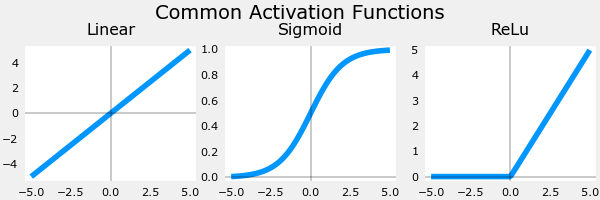

In [8]:
plt_act_trio()

In [9]:
def my_softmax(z):
    ez=np.exp(z)
    a=ez/np.sum(ez)
    return a

In [11]:
z=np.array([1,2,3,4])
a=my_softmax(z)
print(a)

[0.03 0.09 0.24 0.64]


In [12]:
X,y =load_data()

In [14]:
print("The first element of X is :", X[0])

The first element of X is : [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [15]:
print("The first element of X is :", y[0,0])
print("The last element of y is :", y[-1,0])

The first element of X is : 0
The last element of y is : 9


In [17]:
str(X.shape)

'(5000, 400)'

In [19]:
str(y.shape)

'(5000, 1)'

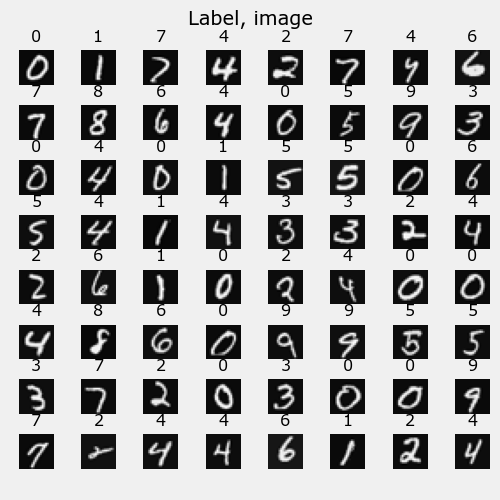

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [23]:
tf.random.set_seed(1234)
model=Sequential(
[
    tf.keras.layers.InputLayer((400)),
    tf.keras.layers.Dense(25, activation="relu", name="L1"),
    tf.keras.layers.Dense(15, activation="relu", name="L2"),
    tf.keras.layers.Dense(10, activation="linear", name="L3")
], name="my_model"
)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [24]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


[layer1, layer2, layer3] = model.layers

In [30]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)
history=model.fit(X,y, epochs=40)

Epoch 1/40
157/157 [==============================] - 1s 1ms/step - loss: 1.4380
Epoch 2/40
157/157 [==============================] - 0s 884us/step - loss: 0.5948
Epoch 3/40
157/157 [==============================] - 0s 872us/step - loss: 0.4125
Epoch 4/40
157/157 [==============================] - 0s 861us/step - loss: 0.3407
Epoch 5/40
157/157 [==============================] - 0s 882us/step - loss: 0.3005
Epoch 6/40
157/157 [==============================] - 0s 853us/step - loss: 0.2725
Epoch 7/40
157/157 [==============================] - 0s 854us/step - loss: 0.2494
Epoch 8/40
157/157 [==============================] - 0s 848us/step - loss: 0.2295
Epoch 9/40
157/157 [==============================] - 0s 863us/step - loss: 0.2168
Epoch 10/40
157/157 [==============================] - 0s 872us/step - loss: 0.2001
Epoch 11/40
157/157 [==============================] - 0s 897us/step - loss: 0.1873
Epoch 12/40
157/157 [==============================] - 0s 949us/step - loss: 0.1772
Epo

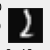

1/1 [==============================] - 0s 74ms/step
 predicting a Two: 
[[-10.18  -0.07   3.42  -0.18 -12.92  -5.98  -4.19   1.16  -5.36  -9.39]]
 Largest Prediction index: 2


In [31]:
image_of_two=X[1015]
display_digit(image_of_two)
prediction=model.predict(image_of_two.reshape(1,400))
print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")